# __Использованные материалы__
* [Что такое автоматизированное машинное обучение (AutoML)](https://habr.com/ru/post/449260/)
* [Announcing PyCaret](https://towardsdatascience.com/announcing-pycaret-an-open-source-low-code-machine-learning-library-in-python-4a1f1aad8d46)
* [Представляем PyCaret: открытую low-code библиотеку машинного обучения на Python](https://habr.com/ru/company/otus/blog/497770/)
* [AutoML materials](https://www.automl.org/book/)
* [Сравнение библиотек AutoML](https://kaggle.com/andreshg/automl-libraries-comparison/notebook#4.-PyCaret)
* [PyCaret GitHub](https://github.com/pycaret/pycaret)
* [PyCaret Guide](https://pycaret.org/guide/)
* [LAMA GitHub](https://github.com/sberbank-ai-lab/LightAutoML)
* [Hands-On Python Guide to LAMA](https://analyticsindiamag.com/hands-on-python-guide-to-lama-an-automatic-ml-model-creation-framework/)

# __Поставленные цели__
Нотбук ставит перед собой следующие цели:
* Предоставить ссылки для изучения материала

<em>(Для того, чтобы не вести конспекты по использованным материалам, а приступить непосредственно к задаче, в каждом разделе будут предоставлены источники, с которыми можно ознакомиться для понимания темы.)</em>
* Продемонстрировать использование библиотек PyCaret и LAMA на соревновательном датасете с kaggle
* Углубленно изучить возможности и реализацию библиотек PyCaret и LAMA

# __AutoML__
AutoML - процесс автоматизации сквозного процесса применения машинного обучения к задачам реального мира.<br>
Хорошим источником для краткого введения служит [статья с хабра](https://habr.com/ru/post/449260/).<br>
Для углубленного изучения явления AutoML можно изучить следующий [сайт](https://www.automl.org/book/).<br>
Как таковой библиотек AutoML, помимо PyCaret и LAMA достаточно много, к примеру:
* Auto-Sklearn
* TPOT
* Auto-ViML
* H2O AutoML
* Auto-Keras
* MLBox
* Hyperopt Sklearn
* AutoGluon <br>

Можно долго и упорно сравнивать каждую из них по различным параметрам, хороший нотбук на эту тему можно посмотреть [тут](https://kaggle.com/andreshg/automl-libraries-comparison/notebook#4.-PyCaret), но основная цель нотбука состоит не в этом. Поэтому для общего понимания достаточно ознакомиться с вышеупомянутой статьей на хабре и приступить к библиотекам PyCaret и LAMA.

## __PyCaret__
__PyCaret__ – библиотека машинного обучения с открытым исходным кодом на Python для обучения и развертывания моделей с учителем и без учителя в low-code среде. PyCaret позволит вам пройти путь от подготовки данных до развертывания модели за несколько секунд в той notebook-среде, которую вы выберете.<br>
Для краткого введения можно почитать на выбор одну из статьей:
* [Announcing PyCaret](https://towardsdatascience.com/announcing-pycaret-an-open-source-low-code-machine-learning-library-in-python-4a1f1aad8d46)
* [Рускоязычный вариант предыдущей статьи](https://habr.com/ru/company/otus/blog/497770/)

Мною при дальнейшей работе будет использоваться официальный [гайд](https://pycaret.org/guide/).


## __LAMA__
__LightAutoML(LAMA)__ - это open-source фрэймворк разработанный Сбербанк AI lab AutoML group, который ориентирован на AutoML и предоставляет комплексные решения задач машинного обучения.<br>
Хорошей статьей для краткого введения для себя я выделил следующую [Hands-On Python Guide to LAMA](https://analyticsindiamag.com/hands-on-python-guide-to-lama-an-automatic-ml-model-creation-framework/).<br>
Более развернутый видео-гайд предоставлен на [гите LAMA](https://github.com/sberbank-ai-lab/LightAutoML) в разделе Resources.


# __Работа с kaggle датасетом__
Для этих целей возьмем соревновательный датасет по предсказанию цен на недвижимость - [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview).<br>
Устанавливаем kaggle через pip.

In [1]:
!pip install kaggle

  Using cached kaggle-1.5.12.tar.gz (58 kB)
  Using cached python_slugify-5.0.2-py2.py3-none-any.whl (6.7 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=83aa9c233f2aba3d3349c825c6141564e18377b359c863eff8ba86a3f6299c4c
  Stored in directory: c:\users\fire9\appdata\local\pip\cache\wheels\62\d6\58\5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


Теперь нам необходимо создать API токен на kaggle по адресу `https://www.kaggle.com/<username>/account` и поместить его в папку .kaggle, расположение которой зависит от ОС:
* Для Windows - `C:\Users\<Windows-username>\.kaggle\kaggle.json`
* Для Linux систем - ```~/.kaggle/kaggle.json```

Далее скачиваем и распаковываем датасет.

In [2]:
!mkdir AutoML-Dataset 
%cd .\AutoML-Dataset
!kaggle competitions download -c house-prices-advanced-regression-techniques

C:\A.Mindset\internship_ds\Automl+PyCaret+lama\AutoML-Dataset




  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|##########| 199k/199k [00:00<00:00, 17.0MB/s]


In [4]:
from zipfile import ZipFile
import os
zip_file = ZipFile('house-prices-advanced-regression-techniques.zip')
zip_file.extractall()
zip_file.close()
os.remove("house-prices-advanced-regression-techniques.zip")
%cd ..

C:\A.Mindset\internship_ds\Automl+PyCaret+lama


In [47]:
import pandas as pd
import numpy as np 
import csv
train_source = pd.read_csv('AutoML-Dataset/train.csv', low_memory=False).set_index('Id')
train_source

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [139]:
test_source = pd.read_csv('AutoML-Dataset/test.csv', low_memory=False).set_index('Id')
test_source

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [140]:
train_source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [141]:
train = train_source.sample(frac=0.88)
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
926,20,RL,NaN,15611,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,3,2008,WD,Abnorml,175000
724,50,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,135000
156,50,RL,60.0,9600,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,79000
889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
841,70,RH,NaN,12155,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,90,RL,81.0,11841,Grvl,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,118500
652,70,RL,60.0,9084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,108000
373,120,RL,50.0,7175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,125000


In [142]:
test = train_source.drop(train.index)
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Abnorml,119000
1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,64500


In [143]:
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
1,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
2,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
3,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
4,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Abnorml,119000
171,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
172,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,64500
173,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000


In [144]:
from pycaret.regression import *
reg_setup = setup(data = train, 
             target = 'SalePrice',
             train_size = 0.86381322957,
             # Нормируем данные
             normalize = True,
             # Отключаем подтверждение типов данных при выполнении настройки
             silent = True)

,Description,Value
0,session_id,3000
1,Target,SalePrice
2,Original Data,"(1285, 80)"
3,Missing Values,True
4,Numeric Features,18
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1109, 401)"


In [145]:
best_models = compare_models(
    # N лучших моделей
    n_select=3, 
    # По истечению времени в минутах приостановливает выполнение и возвращает результат
    budget_time=60) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,15569.8573,611118363.2477,24350.5045,0.9091,0.1338,0.0912,0.2920
br,Bayesian Ridge,16219.6179,623145162.6040,24773.2645,0.9048,0.1350,0.0968,0.1030
par,Passive Aggressive Regressor,15687.3644,685476388.7734,25559.6541,0.9011,0.1260,0.0907,0.2150
omp,Orthogonal Matching Pursuit,16772.9268,658025917.7546,25380.3008,0.8992,0.1383,0.0987,0.0210
gbr,Gradient Boosting Regressor,16472.8389,684502619.6397,25724.1826,0.8980,0.1337,0.0967,0.2320
ridge,Ridge Regression,16992.7374,674541046.5675,25783.7764,0.8959,0.1574,0.1012,0.0230
lasso,Lasso Regression,18473.4280,772490273.4938,27548.4640,0.8807,0.1815,0.1129,0.0990
lightgbm,Light Gradient Boosting Machine,17440.0186,825429832.3938,28181.3015,0.8788,0.1383,0.0998,0.0800
rf,Random Forest Regressor,18124.0087,867150829.2220,28839.3996,0.8725,0.1510,0.1077,0.6140
en,Elastic Net,19009.0479,945950602.4243,30126.6380,0.8625,0.1506,0.1124,0.0210


In [146]:
best_models

[HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
                tol=1e-05, warm_start=False),
 BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
               compute_score=False, copy_X=True, fit_intercept=True,
               lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
               normalize=False, tol=0.001, verbose=False),
 PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                            epsilon=0.1, fit_intercept=True,
                            loss='epsilon_insensitive', max_iter=1000,
                            n_iter_no_change=5, random_state=3000, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)]

In [147]:
huber = create_model('huber', cross_validation = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15983.0636,546288144.3675,23372.8078,0.9040,0.1672,0.0985
1,16055.9661,654259539.0884,25578.4976,0.9076,0.1276,0.0832
2,15307.9388,636730995.2181,25233.5292,0.9201,0.1486,0.1009
3,15868.3660,462428064.2021,21504.1406,0.9082,0.1675,0.1069
4,16722.6665,730007472.1866,27018.6505,0.8947,0.1491,0.0951
5,14986.1719,373527533.3232,19326.8604,0.9427,0.1044,0.0831
6,15861.9109,608591351.2674,24669.6443,0.8803,0.1234,0.0911
7,15226.7288,647892625.3298,25453.7350,0.9031,0.1055,0.0829
8,13636.5595,306704077.7039,17512.9688,0.9322,0.1157,0.0886
9,16049.2011,1144753829.7901,33834.2109,0.8979,0.1291,0.0815


In [148]:
#Подбираем лучшие гиперпараметры.
tuned_huber = tune_model(huber, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15896.3145,527761696.6220,22973.0646,0.9072,0.1678,0.0987
1,16455.6826,658383773.4420,25658.9901,0.9070,0.1287,0.0856
2,15331.3648,673617739.5941,25954.1469,0.9154,0.1520,0.1025
3,15707.3438,448764147.5952,21184.0541,0.9109,0.1455,0.1047
4,16842.9650,711057916.8342,26665.6693,0.8975,0.1521,0.0978
5,15329.0226,379548690.7410,19482.0094,0.9418,0.1037,0.0836
6,15598.9147,613836537.5238,24775.7248,0.8792,0.1219,0.0884
7,15405.6601,680372328.5076,26083.9477,0.8982,0.1075,0.0829
8,13987.1210,326093507.3685,18058.0593,0.9279,0.1161,0.0901
9,15994.3642,1250324909.1224,35359.9337,0.8885,0.1181,0.0791


In [20]:
!pip install shap

In [58]:
import shap
interpret_model(tuned_huber)

TypeError: This function only supports tree based models for binary classification: rf, lightgbm, dt, et.

Интерпретация конкретной точки данных в тестовом датасете может быть оценена с помощью графика «reason». В приведенном ниже примере мы проверяем первый экземпляр в тестовом датасете.

In [59]:
interpret_model(tuned_huber, plot = 'reason', observation = 1)

TypeError: This function only supports tree based models for binary classification: rf, lightgbm, dt, et.

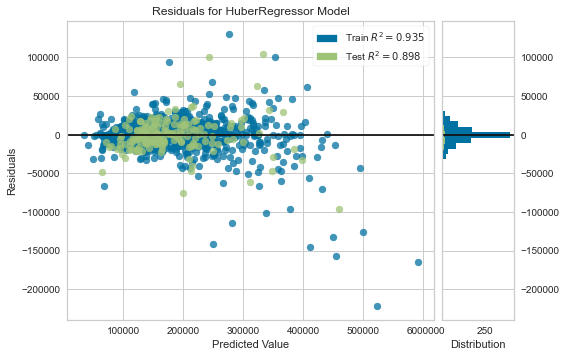

In [149]:
plot_model(tuned_huber)

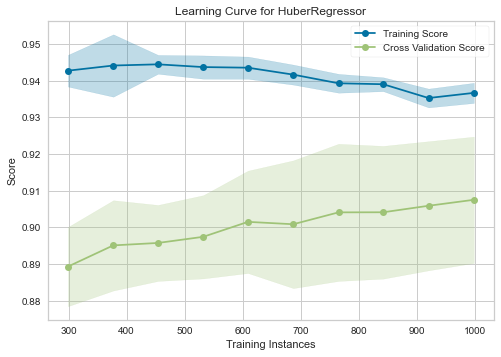

In [150]:
plot_model(tuned_huber, plot = 'learning')

In [151]:
predict = predict_model(tuned_huber)
predict

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,14941.1021,504676507.5459,22465.0063,0.8981,0.1206,0.0866


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,1.410199e-02,-0.160909,-0.455590,-1.313701,-0.594263,0.201434,0.794540,-0.902308,-0.447728,-0.784022,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,129900,110409.474697
1,2.917327e+00,-0.083044,-1.050429,-1.700877,-0.594263,-0.010823,-0.283586,-0.606796,-0.779557,-0.480259,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,160000,150776.694711
2,-1.292349e+00,-1.082524,1.097601,1.009354,-0.516873,-0.951146,-0.283586,1.716700,0.728312,0.951766,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,191000,184541.161667
3,-4.697688e-01,-0.550236,0.337528,1.106148,-0.594263,0.475315,-0.283586,-0.888773,-0.564844,-0.914207,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,130500,128366.806801
4,4.011986e-01,0.001051,0.139249,-0.442555,-0.594263,-0.544890,-0.283586,0.155672,-0.525805,-0.870812,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,162900,185705.045488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,-7.722820e-08,-0.886926,1.064554,0.912560,0.538954,0.523244,-0.283586,-0.863959,-0.486767,-0.827417,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,149000,137438.241418
172,-7.722820e-08,-0.344671,-1.711362,-1.700877,-0.594263,-0.987663,-0.283586,-0.563935,-1.777482,-0.320241,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,89500,110122.941243
173,-7.722820e-08,-0.434995,-0.025984,-0.684540,-0.594263,-0.252751,-0.283586,-0.074422,-0.462367,-0.800295,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,110000,127559.195157
174,-9.536396e-01,-0.176482,-1.149569,-1.700877,-0.594263,-0.987663,-0.283586,0.475999,-0.652681,-1.011845,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,141000,122671.240465


In [152]:
unseen_test_set = predict_model(tuned_huber, data = test)
unseen_test_set

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Label
0,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,176385.263972
1,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,222969.290098
2,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,129500,136779.633360
3,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000,151727.108668
4,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000,91418.751717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,MnPrv,NaN,0,2,2010,WD,Abnorml,119000,104565.697560
171,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,10,2009,WD,Normal,143750,131828.878169
172,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,64500,100801.113248
173,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,191000,234384.686063


In [153]:
from pycaret.utils import check_metric
check_metric(unseen_test_set['SalePrice'],unseen_test_set['Label'], metric = 'R2')

0.2691

In [154]:
check_metric(predict['SalePrice'],predict['Label'], metric = 'R2')

0.8981